In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
tf.__version__

'2.7.0'

In [3]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Data/GoogleStockLSTM")

In [4]:
!ls

Google_Stock_Price_Test.csv  Google_Stock_Price_Train.csv  model.png


In [51]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv')
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
print("null entries: ", train_data.isnull().sum().sum())

null entries:  0


In [8]:
train_data.shape

(1258, 6)

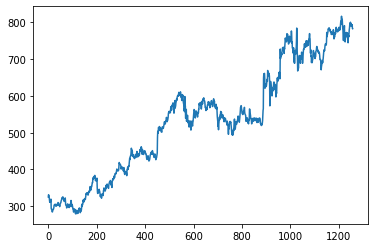

In [9]:
plt.plot(train_data['Open'])

In [52]:
train_data = train_data['Open']
print(train_data.head())
print(train_data.shape)

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64
(1258,)


In [11]:
np.array(train_data).reshape(-1,1).shape

(1258, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_trans = sc.fit_transform(np.array(train_data).reshape(-1,1))

In [13]:
type(train_trans)

numpy.ndarray

In [14]:
train_trans[0:60]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

In [15]:
train_trans[60]

array([0.08627874])

In [16]:
len(train_trans)

1258

In [17]:
X_train = []
y_train = []
for i in range(60,len(train_trans)):
  X_train.append(train_trans[i-60:i])
  y_train.append(train_trans[i])

X_train = np.array(X_train).reshape(len(X_train), 60,1)
y_train = np.array(y_train)

In [18]:
len(X_train), X_train.shape, y_train.shape

(1198, (1198, 60, 1), (1198, 1))

In [19]:
type(X_train), type(y_train), X_train.shape, y_train.shape

(numpy.ndarray, numpy.ndarray, (1198, 60, 1), (1198, 1))

In [20]:
train_data1 = np.concatenate((X_train.reshape(X_train.shape[0], X_train.shape[1]), y_train), axis=1)
train_df = pd.DataFrame(train_data1)

In [21]:
train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838,0.072383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,0.934445,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,0.931394,0.946369,0.965697,0.975110,0.959670,0.978086,1.000000,0.980765,0.970831,0.984504,0.960544,0.937142,0.928417,0.908047,0.877186,0.921534,0.938091,0.931654,0.952545,0.888124,0.886375,0.870321,0.885631,0.907434,0.915712,0.899416,0.918056,0.908940,0.902485,0.894561,0.916009,0.913293,0.889798,0.865894,0.890301,0.903360,0.896421,0.917777,0.931766,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043
1194,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,0.931394,0.946369,0.965697,0.975110,0.959670,0.978086,1.000000,0.980765,0.970831,0.984504,0.960544,0.937142,0.928417,0.908047,0.877186,0.921534,0.938091,0.931654,0.9

In [22]:
np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)).shape

(1198, 60, 1)

In [23]:
# Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.utils import plot_model

In [24]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1) ))
model.add(Dropout(0.5))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

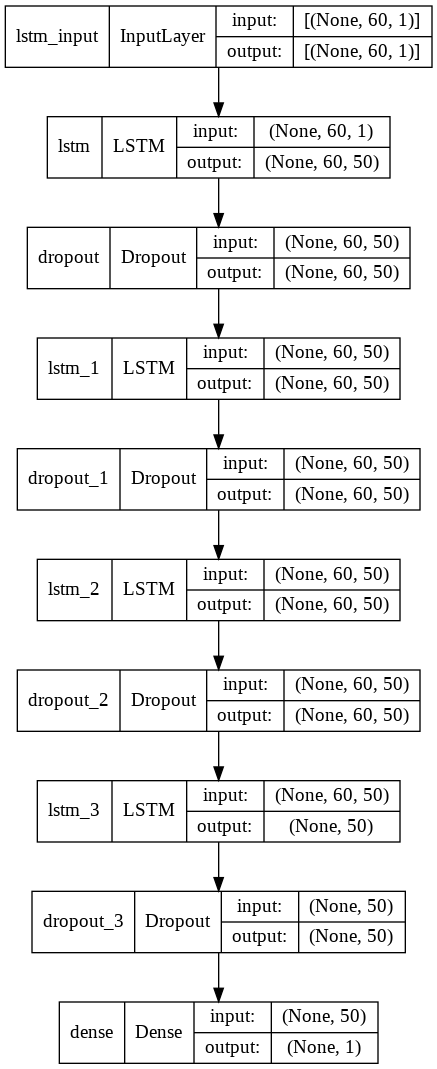

In [25]:
plot_model(model, show_shapes=True)

In [26]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss',mode='min',patience=6, restore_best_weights=True, min_delta=0.0005)

In [75]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0011
Epoch 2/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0011
Epoch 3/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0013
Epoch 4/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0012
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0011
Epoch 6/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0013
Epoch 7/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0011
Epoch 8/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0011
Epoch 9/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0012
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0012
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0012
Epoch 12/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0011
Epoch 13/100


In [29]:
!ls

Google_Stock_Price_Test.csv  Google_Stock_Price_Train.csv  model.png


In [43]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
print(test_data.head())
print(test_data.shape)

       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400
(20, 6)


In [47]:
test_data = test_data['Open']
print(test_data.head())
print(test_data.shape)

0    778.81
1    788.36
2    786.08
3    795.26
4    806.40
Name: Open, dtype: float64
(20,)


In [32]:
test_scaled = sc.transform(np.array(test_data).reshape(-1,1))
print(test_scaled)
print(test_scaled.shape)
print(type(test_scaled))

[[0.92955205]
 [0.94731751]
 [0.94307612]
 [0.96015329]
 [0.98087655]
 [0.98359253]
 [0.97827219]
 [0.98225314]
 [0.98288563]
 [0.98214153]
 [0.979779  ]
 [0.97849542]
 [0.98182528]
 [0.98245777]
 [1.01045465]
 [1.02407173]
 [1.03930724]
 [1.03354044]
 [0.99624228]
 [0.9631297 ]]
(20, 1)
<class 'numpy.ndarray'>


In [33]:
train_trans.shape, type(train_trans)

((1258, 1), numpy.ndarray)

In [34]:
train_trans

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [53]:
train_data

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [57]:
total_data = np.concatenate([train_data, test_data], axis=0)
print(total_data)
print(total_data.shape)
print(type(total_data))

[325.25 331.27 329.83 ... 834.71 814.66 796.86]
(1278,)
<class 'numpy.ndarray'>


In [60]:
total_data = total_data[len(total_data)-len(test_data)-60:]
data_scaled = sc.transform(total_data.reshape(-1,1))
total_data.shape

(80,)

In [55]:
len(test_data)

20

In [69]:
#preparing test data
X_test = []
y_test = []

# for i in range(0, len(test_data),1):
#   low = len(total_data)-len(test_data)-60 + i
#   high = len(total_data)-len(test_data) + i
#   #print(len(total_data)-len(test_data)-60 + i, len(total_data)-len(test_data) + i)
#   X_test.append(total_data[low:high])
#   y_test.append(total_data[high])

for i in range(60, 60+len(test_data)):
  X_test.append(data_scaled[i-60:i,0])
  y_test.append(data_scaled[i])

In [71]:
X_test = np.array(X_test).reshape(len(test_data),60,1)

In [76]:
y_pred = model.predict(X_test)

In [77]:
predicted = sc.inverse_transform(y_pred)

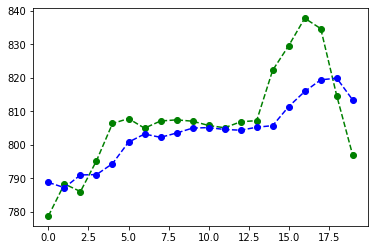

In [78]:
plt.plot(test_data, 'go--', label="original")
plt.plot(predicted, 'bo--', label="Predicted")